In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Let's import the citipy script and practice using it. 
# In our "API_practice file", add a new cell and import the citipy.py script from the citipy module.

# But works on WeatherPy file, not over "API_practice file".

# Use the citipy module to determine city based on latitude and longitude.
# from citipy import citipy

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

zvecka rs
jamestown sh
ambon id
belushya guba ru
esperance au
joao pinheiro br
faanui pf
punta arenas cl
pirovskoye ru
kapoeta sd
belushya guba ru
jamestown sh
lahij ye
mizan teferi et
ahipara nz
ilulissat gl
busselton au
cherskiy ru
marawi sd
castro cl
hilo us
bakchar ru
thompson ca
ushuaia ar
greymouth nz
mahebourg mu
oktyabrskoye ru
larsnes no
kodiak us
kapaa us
ushuaia ar
shimoda jp
tumannyy ru
ushuaia ar
juneau us
ostersund se
jamestown sh
lasa cn
ushuaia ar
cape town za
sitka us
kaitangata nz
cape town za
hithadhoo mv
dudinka ru
victoria sc
carnarvon au
waipawa nz
bengkulu id
shache cn
arys kz
atuona pf
havoysund no
shevchenkove ua
constitucion mx
constitucion mx
albany au
busselton au
tiksi ru
sao joao da barra br
kongolo cd
vaini to
rikitea pf
namatanai pg
east london za
vaini to
longyearbyen sj
rio gallegos ar
ushuaia ar
cape town za
mahebourg mu
kodiak us
busselton au
bredasdorp za
atuona pf
tuktoyaktuk ca
esperance au
avarua ck
port lincoln au
port alfred za
kapaa us
illoqqo

hermanus za
yumen cn
busselton au
cape town za
barrow us
lolua tv
geraldton au
kaitangata nz
ekhabi ru
taolanaro mg
cayenne gf
surt ly
rikitea pf
bambous virieux mu
chuy uy
businga cd
punta arenas cl
tasiilaq gl
vaitupu wf
ushuaia ar
kurilsk ru
vaini to
rikitea pf
centralia us
taolanaro mg
punta arenas cl
along in
denpasar id
busselton au
hobart au
port alfred za
arraial do cabo br
busselton au
berlevag no
cascais pt
imeni poliny osipenko ru
cockburn town tc
tasiilaq gl
rikitea pf
sangar ru
mys shmidta ru
qaanaaq gl
atuona pf
solnechnyy ru
bredasdorp za
guarapari br
rikitea pf
ribeira grande pt
aksarka ru
chupa ru
severo-kurilsk ru
safaqis tn
bethel us
hermanus za
albany au
lukoyanov ru
sibu my
ulladulla au
cape town za
hobart au
walvis bay na
cayenne gf
jayanca pe
barbar sd
busselton au
auki sb
bambous virieux mu
ushuaia ar
tazovskiy ru
sidi bin nur tn
barawe so
punta arenas cl
mataura pf
cape town za
los llanos de aridane es
rikitea pf
charters towers au
mataura pf
saint-philippe re


gushikawa jp
fortuna us
atuona pf
rikitea pf
vaini to
yellowknife ca
new norfolk au
mount isa au
bluff nz
narsaq gl
new norfolk au
ushuaia ar
taolanaro mg
bluff nz
saint-philippe re
nikolskoye ru
mataura pf
geraldton au
cape town za
provideniya ru
albany au
hilo us
kilindoni tz
illoqqortoormiut gl
adrar dz


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [8]:
import requests
requests.__version__

'2.25.1'

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8a82c46107d54d4458a94656ed52d45e


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zvecka
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | ambon
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | esperance
Processing Record 6 of Set 1 | joao pinheiro
Processing Record 7 of Set 1 | faanui
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | pirovskoye
Processing Record 10 of Set 1 | kapoeta
Processing Record 11 of Set 1 | lahij
Processing Record 12 of Set 1 | mizan teferi
Processing Record 13 of Set 1 | ahipara
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | cherskiy
Processing Record 17 of Set 1 | marawi
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | bakchar
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | ushuaia
Processing Record

Processing Record 37 of Set 4 | bandarbeyla
Processing Record 38 of Set 4 | brae
Processing Record 39 of Set 4 | gweta
Processing Record 40 of Set 4 | grong
Processing Record 41 of Set 4 | hovd
Processing Record 42 of Set 4 | gushikawa
Processing Record 43 of Set 4 | karatuzskoye
Processing Record 44 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 45 of Set 4 | nemuro
Processing Record 46 of Set 4 | torbay
Processing Record 47 of Set 4 | ornskoldsvik
Processing Record 48 of Set 4 | khonuu
City not found. Skipping...
Processing Record 49 of Set 4 | esso
Processing Record 50 of Set 4 | butaritari
Processing Record 1 of Set 5 | tutoia
Processing Record 2 of Set 5 | la rioja
Processing Record 3 of Set 5 | aflu
City not found. Skipping...
Processing Record 4 of Set 5 | bonavista
Processing Record 5 of Set 5 | sharanga
Processing Record 6 of Set 5 | dayong
Processing Record 7 of Set 5 | saldanha
Processing Record 8 of Set 5 | miyako
Processing Record 9 of Set 5 | maryst

Processing Record 27 of Set 8 | balkhash
Processing Record 28 of Set 8 | fuyu
Processing Record 29 of Set 8 | la pintada
Processing Record 30 of Set 8 | atotonilco el grande
Processing Record 31 of Set 8 | smithers
Processing Record 32 of Set 8 | lucapa
Processing Record 33 of Set 8 | varzelandia
Processing Record 34 of Set 8 | ambalavao
Processing Record 35 of Set 8 | kimbe
Processing Record 36 of Set 8 | yumen
Processing Record 37 of Set 8 | ekhabi
Processing Record 38 of Set 8 | cayenne
Processing Record 39 of Set 8 | surt
Processing Record 40 of Set 8 | bambous virieux
Processing Record 41 of Set 8 | businga
Processing Record 42 of Set 8 | kurilsk
Processing Record 43 of Set 8 | centralia
Processing Record 44 of Set 8 | along
Processing Record 45 of Set 8 | denpasar
Processing Record 46 of Set 8 | cascais
Processing Record 47 of Set 8 | imeni poliny osipenko
Processing Record 48 of Set 8 | cockburn town
Processing Record 49 of Set 8 | sangar
Processing Record 50 of Set 8 | solnechn

Processing Record 13 of Set 12 | ardakan
Processing Record 14 of Set 12 | lagunas
Processing Record 15 of Set 12 | ciro marina
Processing Record 16 of Set 12 | lata
Processing Record 17 of Set 12 | alyangula
Processing Record 18 of Set 12 | codajas
Processing Record 19 of Set 12 | klaksvik
Processing Record 20 of Set 12 | bereznik
Processing Record 21 of Set 12 | helong
Processing Record 22 of Set 12 | najran
Processing Record 23 of Set 12 | kano
Processing Record 24 of Set 12 | luderitz
Processing Record 25 of Set 12 | maniitsoq
Processing Record 26 of Set 12 | bisceglie
Processing Record 27 of Set 12 | churapcha
Processing Record 28 of Set 12 | lom sak
Processing Record 29 of Set 12 | fukue
Processing Record 30 of Set 12 | iwanai
Processing Record 31 of Set 12 | oschatz
Processing Record 32 of Set 12 | vetluga
Processing Record 33 of Set 12 | tambo
Processing Record 34 of Set 12 | alta floresta
Processing Record 35 of Set 12 | bodden town
Processing Record 36 of Set 12 | diu
Processi

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zvecka,44.6389,20.1647,61.23,43,0,6.91,RS,2021-10-04 06:34:07
1,Jamestown,42.0970,-79.2353,67.59,96,90,1.01,US,2021-10-04 06:30:15
2,Ambon,-3.6954,128.1814,86.14,74,40,4.61,ID,2021-10-04 06:34:07
3,Esperance,-33.8667,121.9000,69.64,41,37,4.83,AU,2021-10-04 06:34:07
4,Joao Pinheiro,-17.7425,-46.1725,78.37,35,100,4.14,BR,2021-10-04 06:34:08
5,Faanui,-16.4833,-151.7500,78.57,73,12,10.96,PF,2021-10-04 06:34:08
6,Punta Arenas,-53.1500,-70.9167,39.31,75,20,29.93,CL,2021-10-04 06:34:08
7,Pirovskoye,57.6267,92.2658,41.76,53,92,3.94,RU,2021-10-04 06:34:09
8,Kapoeta,4.7717,33.5903,79.77,66,74,3.78,SS,2021-10-04 06:34:09
9,Lahij,13.1667,44.5833,90.48,43,89,4.59,YE,2021-10-04 06:34:09


In [14]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [15]:
city_data_df = city_data_df[new_column_order]

In [16]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zvecka,RS,2021-10-04 06:34:07,44.6389,20.1647,61.23,43,0,6.91
1,Jamestown,US,2021-10-04 06:30:15,42.0970,-79.2353,67.59,96,90,1.01
2,Ambon,ID,2021-10-04 06:34:07,-3.6954,128.1814,86.14,74,40,4.61
3,Esperance,AU,2021-10-04 06:34:07,-33.8667,121.9000,69.64,41,37,4.83
4,Joao Pinheiro,BR,2021-10-04 06:34:08,-17.7425,-46.1725,78.37,35,100,4.14
...,...,...,...,...,...,...,...,...,...
562,Atambua,ID,2021-10-04 06:36:40,-9.1061,124.8925,83.55,56,31,5.26
563,San Vicente,AR,2021-10-04 06:36:40,-26.6167,-54.1333,57.87,99,100,6.24
564,Volchanets,RU,2021-10-04 06:36:41,42.9131,132.7469,61.25,73,100,9.89
565,Mount Isa,AU,2021-10-04 06:36:41,-20.7333,139.5000,92.97,13,0,13.80


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

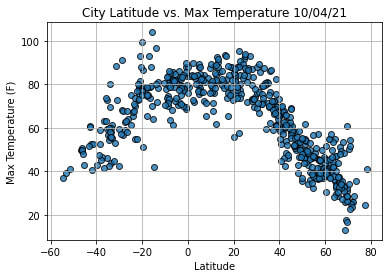

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

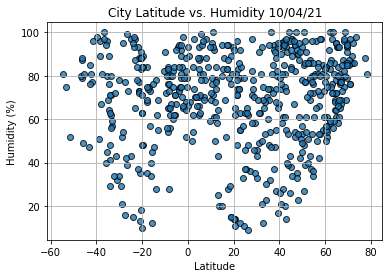

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

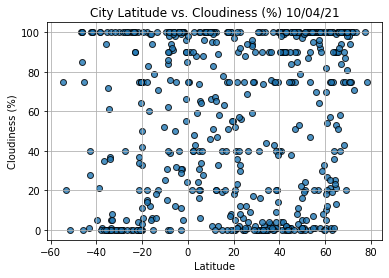

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

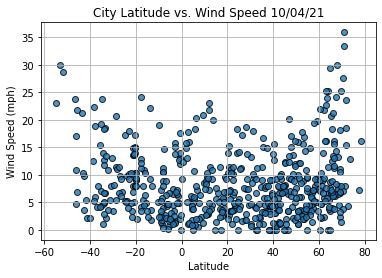

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()